<a href="https://colab.research.google.com/github/jgabrielg99/Python/blob/main/Project_1_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load data set .csv file
data = pd.read_csv('/content/drive/MyDrive/AIML Course/Files/foodhub_order.csv')

In [ ]:
# view the first five rows of the data set
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# check the number of rows and columns of the data set
data.shape

(1898, 9)

There are 1898 rows and 9 columns in this data set.

In [ ]:
# get a description of the types and counts of data within each series
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


*   There is 1 column containing floats, 4 columns containing integers, and 4 columns containing objects (strings and/or other data types)
*  Rating is listed as an object whereas integer would be expected. There may be missing or unexpected values here.



In [ ]:
# number of null/missing values
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64




*   There are no missing values from the data set. However there are likely unexpected values in the ratings column





In [ ]:
# view the statistical data of the numerical categories
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [ ]:
print('The minimum food preparation time is', data['food_preparation_time'].min(), 'minutes')
print('The average food preparation time is', round(data['food_preparation_time'].mean().astype(float), 2), 'minutes')
print('The maximum food preparation time is', data['food_preparation_time'].max(), 'minutes')

The minimum food preparation time is 20 minutes
The average food preparation time is 27.37 minutes
The maximum food preparation time is 35 minutes


In [ ]:
# count the number of unrated orders
data['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

There are 736 orders that were not given a rating

In [ ]:
# count the number of unique order id's
data['order_id'].nunique()

1898

There are no duplicate order id's in this data set

In [ ]:
# count the number of unique customer id's
data['customer_id'].nunique()

1200

There are only 1200 unique customer id's which infers that there 698 orders were placed by a returning customer

In [ ]:
# count the number of restaurants
data['restaurant_name'].nunique()

178

There are a total of 178 different restaurants represented in this data set

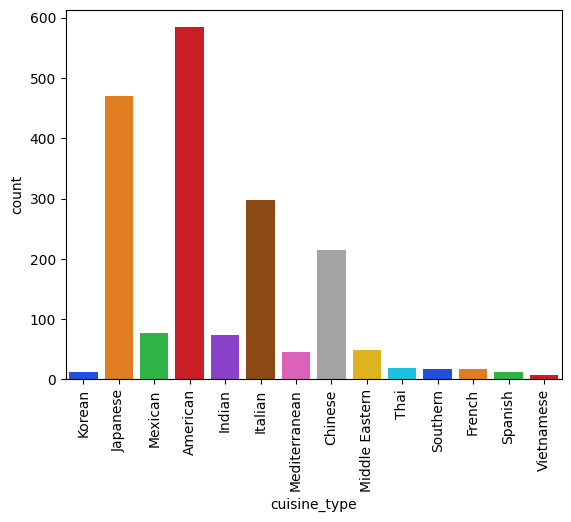

In [ ]:
# compare popularity of cuisine types
sns.countplot(data=data, x='cuisine_type', hue='cuisine_type', palette='bright')
plt.xticks(rotation=90)
plt.show()



*   American is the most popular cuisine type ordered followed by Japanese, Italian, and Chinese
*   Vietnamese is the least commonly ordered cuisine



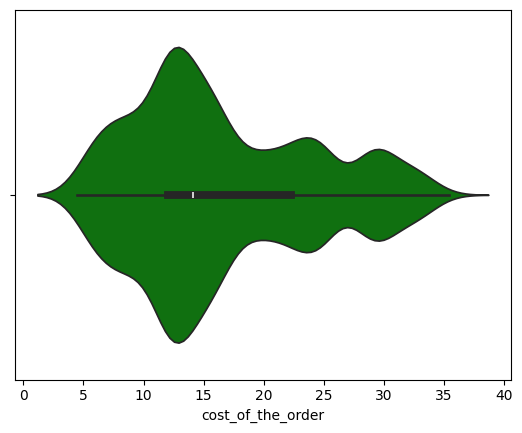

In [ ]:
# plot the cost of order
sns.violinplot(data=data, x='cost_of_the_order', color='green');
plt.show()





*   The cost of the order appears right skewed and multimodal
*   There are no outliers in this particular category



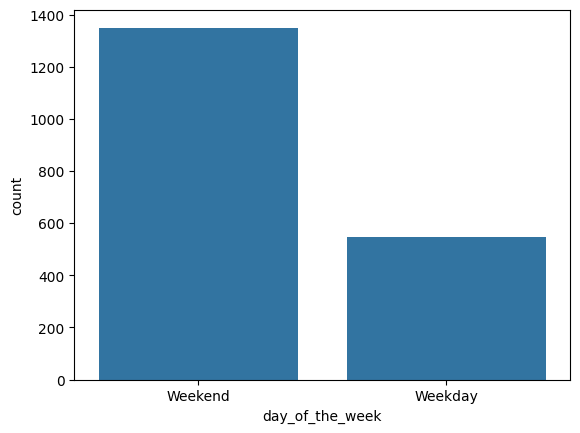

In [ ]:
# visualize days in which orders are placed
sns.countplot(data=data, x='day_of_the_week');

More orders are placed on weekends than during the week.

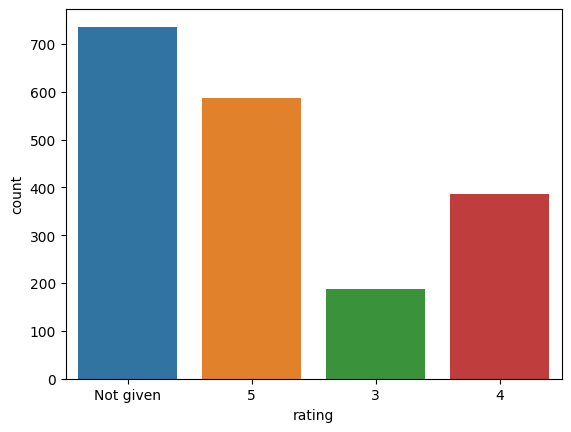

In [ ]:
# visualize counts of ratings
sns.countplot(data=data, x='rating', hue='rating');



*  The most commonly given rating is 5.0
*  The least commonly given rating is 3.0
*  We know that 736 orders were not given a rating






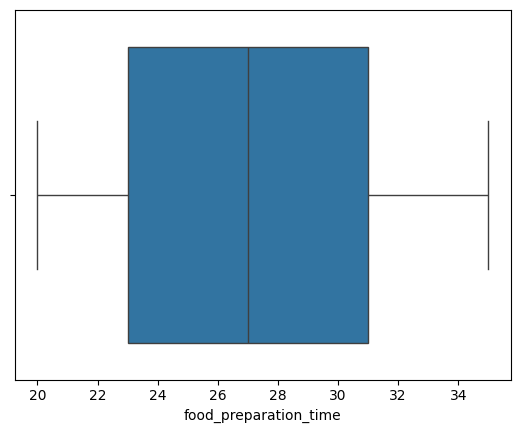

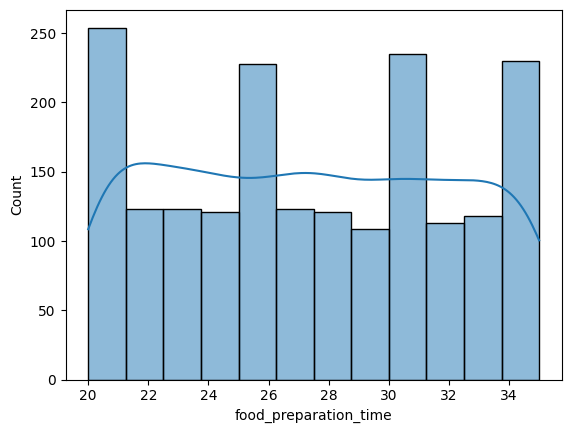

In [ ]:
# view food preparation time data
sns.boxplot(data=data, x='food_preparation_time');
plt.show()
sns.histplot(data=data, x='food_preparation_time', kde=True);
plt.show()

Orders may take anywhere from 20 min to 35 min to prepare. There is a rather even distribution of orders across all food prep times. It appears that 20 min, 25 min, 30 min, and 34 min are the most commonly prep times across the data.

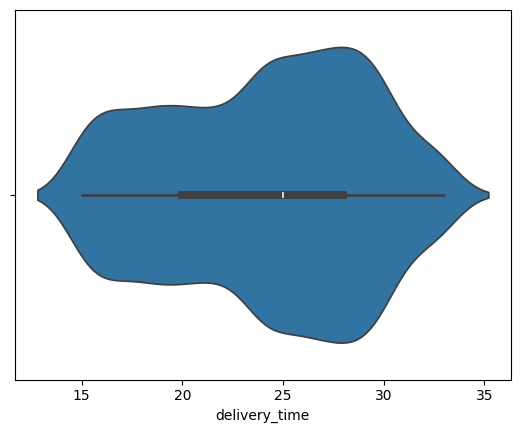

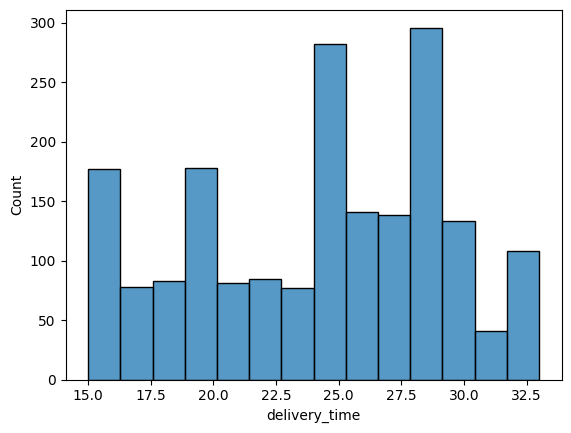

In [ ]:
# view delivery time data
sns.violinplot(data=data, x='delivery_time');
plt.show()
sns.histplot(data=data, x='delivery_time');
plt.show()

In [ ]:
# view the top 5 most frequently ordered from restaurants
data['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

The top 5 restaurants in terms of number of orders are

1.   Shake Shack (219 orders)
2.   The Meatball Shop (132 orders)
3. Blue Ribbon Sushi (119 orders)
4. Blue Ribbon Fried Chicken (96 order)
5. Parm (68 orders)



In [ ]:
data.groupby(['day_of_the_week'])['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

American Cuisine is the most popular cuisine type ordered on the weekend with 415 orders

In [ ]:
# find the percentage of order which cost more that $20
percentage_over20 = data[data['cost_of_the_order']>20.00].shape[0]/data.shape[0]*100

print('The percent of orders placed over $20 is ', round(percentage_over20,2), '%', sep='')

The percent of orders placed over $20 is 29.24%


In [ ]:
# find the average delivery time
avg_delivery_time = data['delivery_time'].mean()

print('The average delivery time is', round(avg_delivery_time,2), 'min', sep=' ')

The average delivery time is 24.16 min


In [ ]:
# find the 3 most frequent customers and the number of order they placed
data['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64



*   Customer [52832] placed 13 orders
*   Customer [47440] placed 10 orders
*   Customer [83287] placed 9 orders





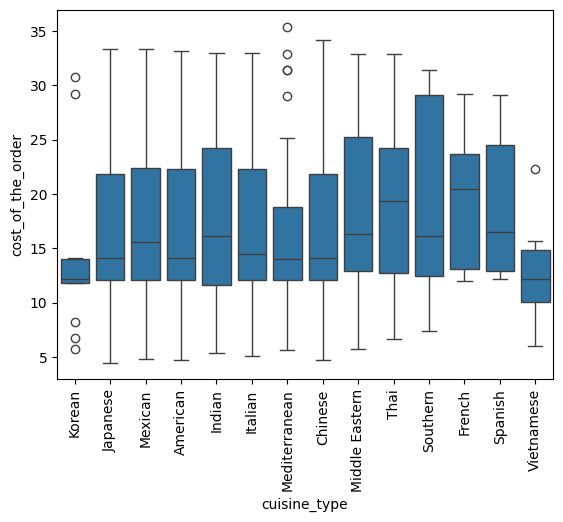

In [ ]:
# view correlation between cuisine type and the cost of the order
sns.boxplot(data=data, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=90);

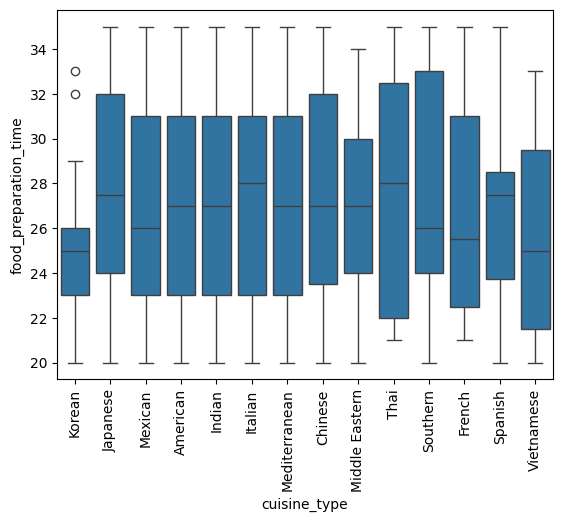

In [ ]:
# view correlation between cuisine type and food preparation time
sns.boxplot(data=data, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=90);

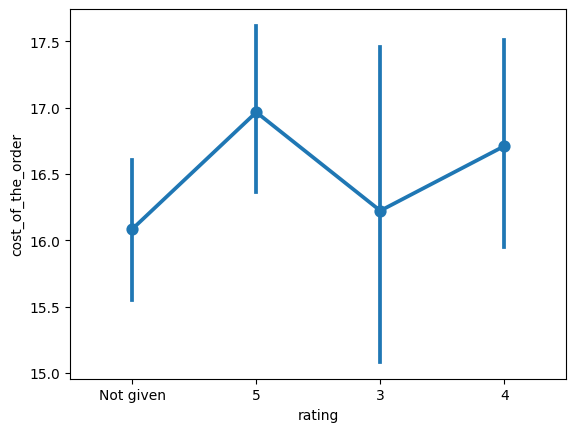

In [ ]:
# view correlation between cost of order and rating
sns.pointplot(data=data, x='rating', y='cost_of_the_order');

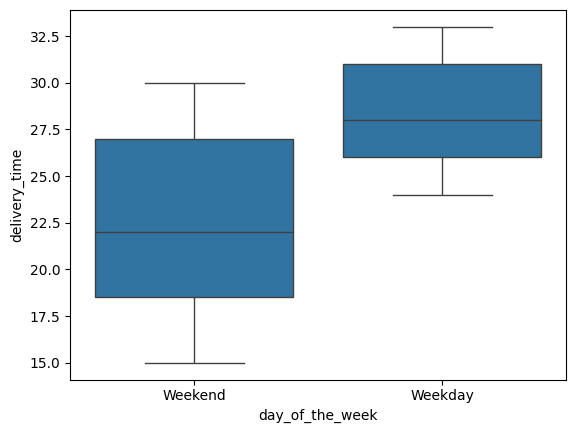

In [ ]:
# view the correlation between day of the week and delivery time
sns.boxplot(data=data, x='day_of_the_week', y='delivery_time');

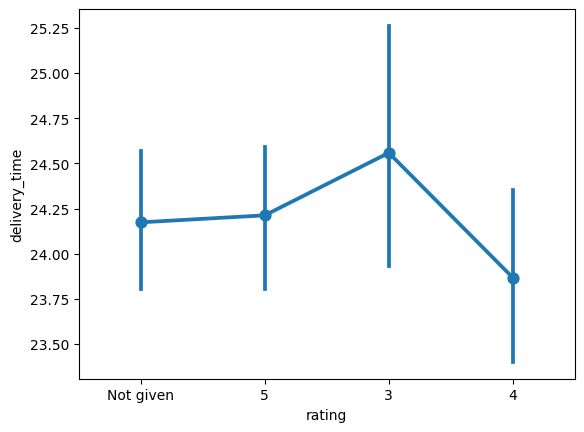

In [ ]:
# view the correlation between rating and delivery time
sns.pointplot(data=data, x='rating', y='delivery_time');

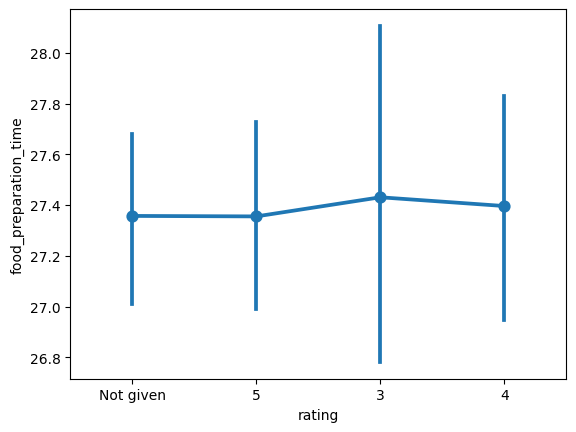

In [ ]:
# view the correlation between rating and food preparation time
sns.pointplot(data=data, x='rating', y='food_preparation_time');

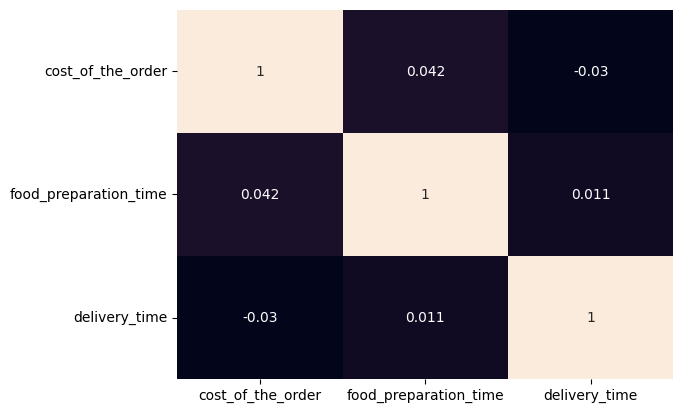

In [ ]:
# visualize correlation via a heatmap
sns.heatmap(data=data[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cbar=False);

In [ ]:
rated = data[data['rating']!='Not given'].copy()
rated['rating'] = rated['rating'].astype('int')

rating_counts = rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
rating_counts


NameError: name 'data' is not defined

In [ ]:
promo_rest = rating_counts[rating_counts['rating']>50]
promo_rest_name = promo_rest['restaurant_name']
promo_rest_name

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

In [ ]:
mean_4 = rated[rated['restaurant_name'].isin(promo_rest_name)].copy()

In [ ]:
mean_4.groupby(['restaurant_name'])['rating'].mean()

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64

QUESTION 14

In [ ]:
def calc_rev(x):
  if x > 20:
    return x*0.25
  elif x > 5:
    return x*0.15
  else:
    return x*0

data['Revenue'] = data['cost_of_the_order'].apply(calc_rev)
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
total_rev = data['Revenue'].sum()

In [ ]:
data['total_time'] = data['food_preparation_time'] + data['delivery_time']
data[data['total_time']>60].shape[0]/100

2.0

In [ ]:
data[data['day_of_the_week']=='Weekday']['delivery_time'].mean()

28.340036563071298

In [ ]:
data[data['day_of_the_week']=='Weekend']['delivery_time'].mean()

22.4700222057735